# 1

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style()

In [3]:
df = pd.read_csv('data/dat16dim.csv')

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,-0.508910,-0.378087,-0.371210,1.115875,0.257205,0.072685,-0.744152,-0.068617,0.065921,-0.217641,0.314271,-0.183273,0.022544,0.567780,-0.151900,0.630580
1,-0.988902,0.280103,0.537185,-0.004824,0.253437,0.803134,-0.654427,0.152514,0.222475,-0.293942,-0.264489,0.165813,-0.268357,-0.021441,0.485079,0.616175
2,0.991531,0.786756,0.943396,0.850585,0.982256,0.740635,0.936924,1.129838,1.803260,1.579217,0.650634,2.392939,0.953295,1.303375,1.109064,1.493235
3,0.840447,1.173263,1.513912,0.284373,0.908243,1.281220,0.720532,0.435628,1.791201,0.523316,1.304601,1.429861,1.004693,0.972270,1.434031,1.972093
4,1.737341,0.988784,0.678757,1.120679,1.342770,1.148523,0.115853,1.165170,0.522036,1.095994,1.089666,1.796138,1.643636,0.988533,0.623244,1.451771


Как мы посмотрим что ничего непонятно по 2-3 координатам? А давайте мы их все нарисуем! Ладно, наверное, плохая идея, их будет слишком дофига штук, $560$. Ну хотя бы попарные?

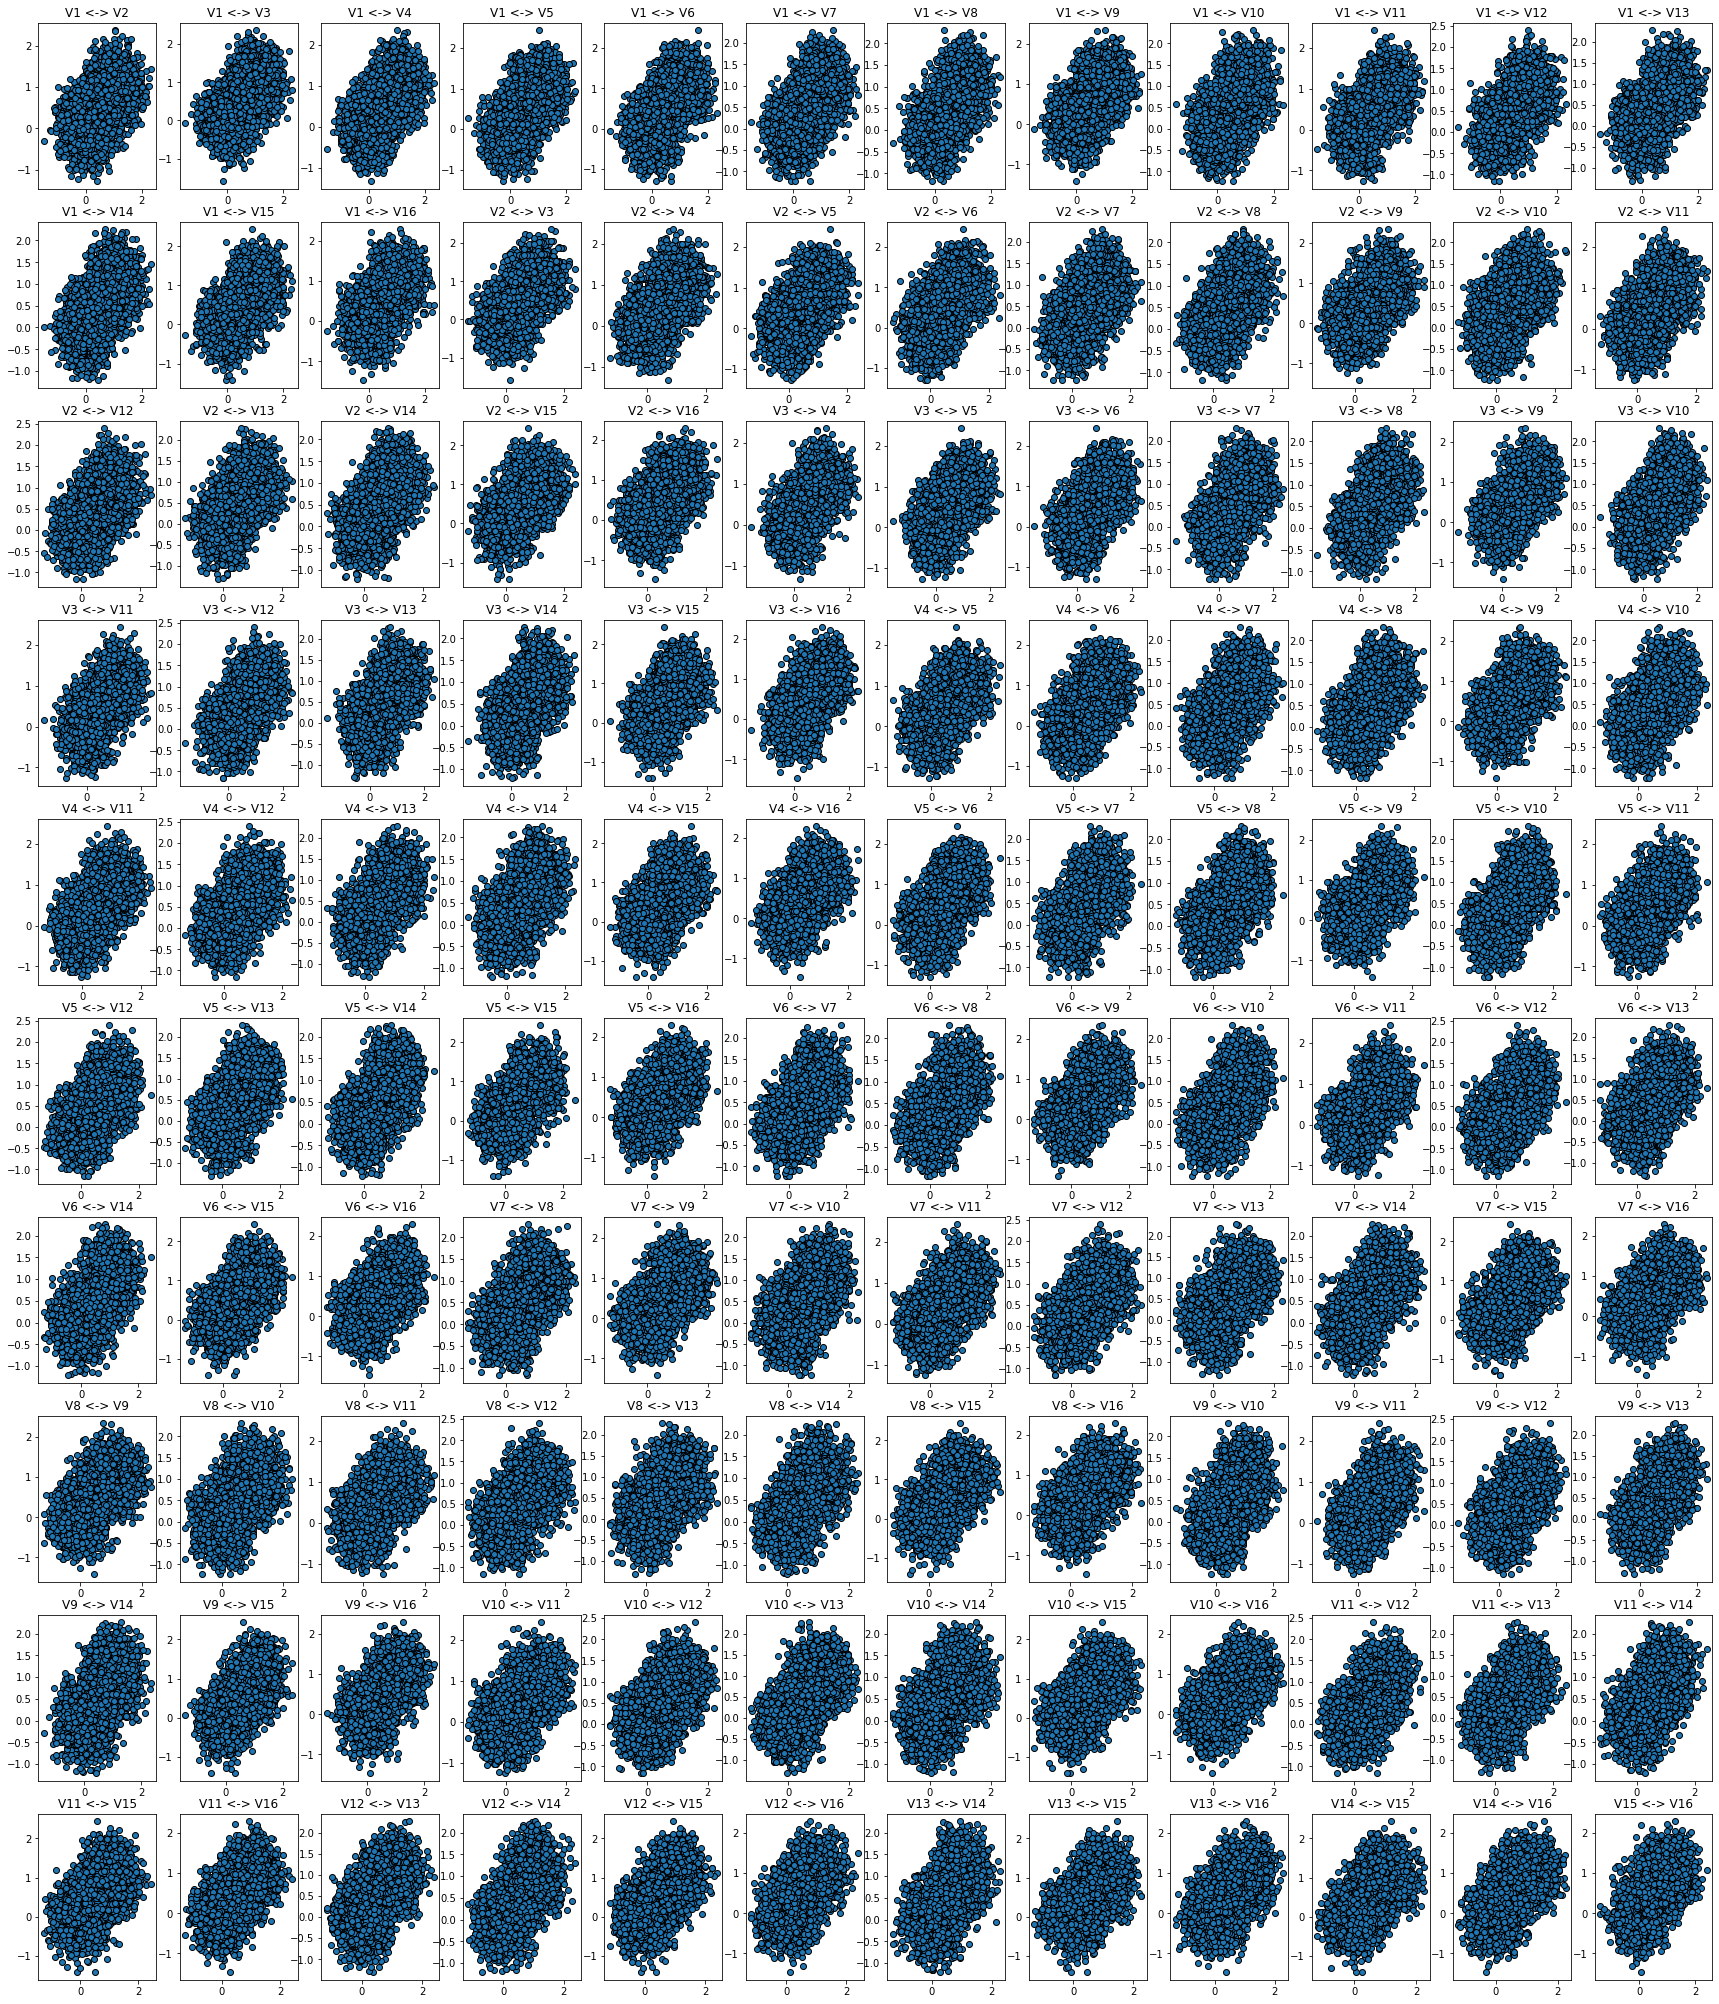

In [4]:
from itertools import combinations

fig, axs = plt.subplots(10, 12, figsize=(30,36))

for (x, y), ax in zip(combinations(df.columns, 2), axs.flat):
    ax.set_title('%s <-> %s' % (x, y))
    ax.scatter(df[x], df[y], edgecolor='k')

plt.show()

Достаточно очевидно, что они не разделяются ни в одной из комбинаций.

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

df_pca = pca.fit_transform(df)

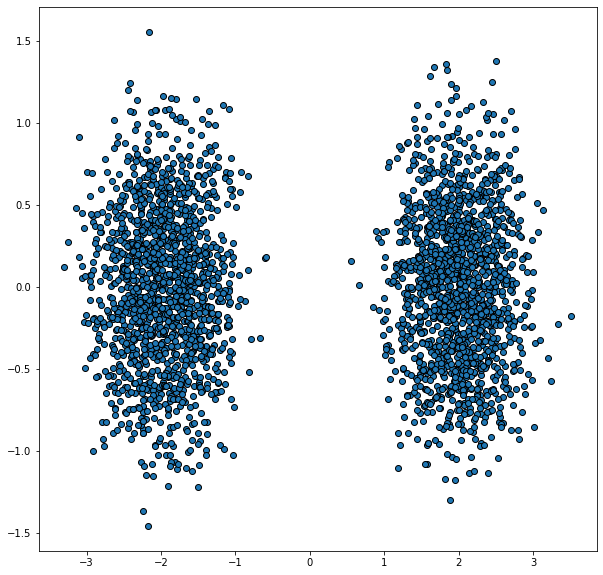

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(df_pca[:, 0], df_pca[:, 1], edgecolor='k')
plt.show()

Как же прекрасны Чебоксары зимой. Давайте теперь к иерархической кластеризации:

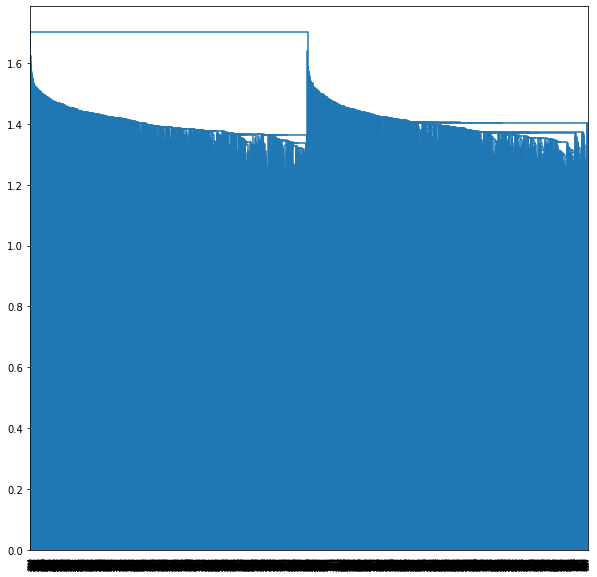

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df, 'single')

plt.figure(figsize=(10, 10))
dendrogram(linked)
plt.show()

Собственно, я не особенно удивлен что оно выглядит так отвратительно - у нас слишком много точек.

In [8]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean')
agg_cluster = cluster.fit_predict(df)

Интересно посмотреть, как PCA соотносится с аггломеративной кластеризацией:

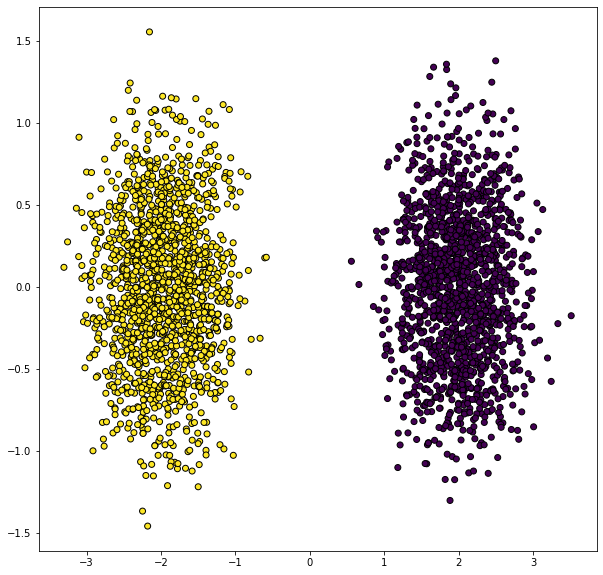

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=agg_cluster, edgecolor='k')
plt.show()

Смотрите как круто!

In [13]:
X = df.copy()
y = agg_cluster

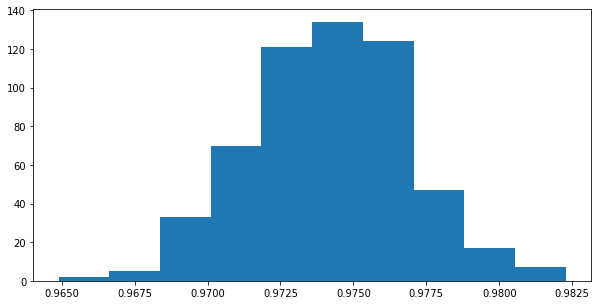

In [16]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score

accs = []

for (c1, c2, c3) in combinations(df.columns, 3):
    model = LogReg(n_jobs=4, penalty='none')
    data = X[[c1, c2, c3]]
    
    model.fit(data, y)
    accs.append(accuracy_score(y, model.predict(data)))
    
plt.figure(figsize=(10, 5))
plt.hist(accs)
plt.show()

In [20]:
for (c1, c2, c3, c4, c5) in combinations(df.columns, 5):
    model = LogReg(n_jobs=4, penalty='none')
    data = X[[c1, c2, c3, c4, c5]]
    
    model.fit(data, y)
    
    if accuracy_score(y, model.predict(data)) == 1.:
        print(c1, c2, c3, c4, c5)
        break

V3 V5 V6 V13 V14


# 2

In [9]:
!wget https://www.picostat.com/system/files/datasets/dataset-51418.csv -O ./data/heptathlon.csv

--2021-12-21 20:07:10--  https://www.picostat.com/system/files/datasets/dataset-51418.csv
Resolving www.picostat.com (www.picostat.com)... 3.142.39.26
Connecting to www.picostat.com (www.picostat.com)|3.142.39.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1559 (1,5K) [text/csv]
Saving to: ‘./data/heptathlon.csv’

./data/heptathlon.c 100%[===================>]   1,52K  --.-KB/s    in 0s      

2021-12-21 20:07:11 (40,9 MB/s) - ‘./data/heptathlon.csv’ saved [1559/1559]



In [24]:
df = pd.read_csv('data/heptathlon.csv')

X = df.drop('score', axis=1).drop('Launa (PNG)', axis=0)
y = df.drop('Launa (PNG)', axis=0)['score']

df.head()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540


In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

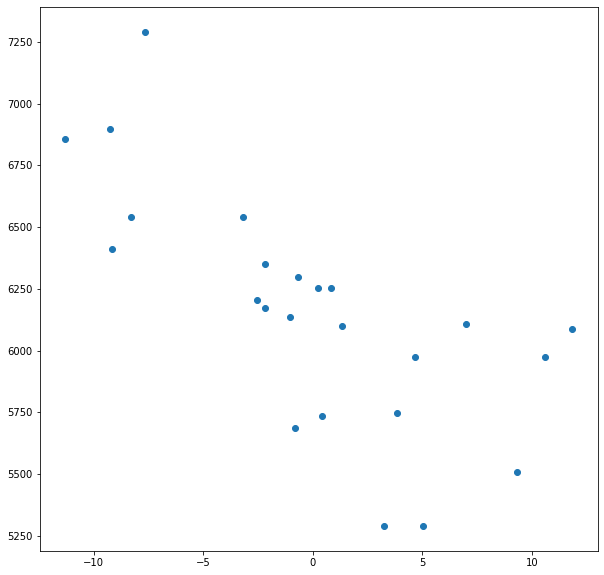

In [26]:
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:,0], y)
plt.show()

Кажется, что мы действительно имеем некоторую зависимость общих скоров от главной компоненты, однако она не прямом прямая. Интересно будет попробовать построить по этому линейную регрессию:

In [27]:
for col, coef in zip(X.columns, pca.components_[0]):
    print('%s: %f' % (col, coef))

hurdles: 0.048991
highjump: -0.001689
shot: -0.109842
run200m: 0.093345
longjump: -0.035796
javelin: -0.203545
run800m: 0.966492


In [28]:
from sklearn.linear_model import LinearRegression as LinReg

model = LinReg(n_jobs=4)

model.fit(X, y)

y_pred = model.predict(X)

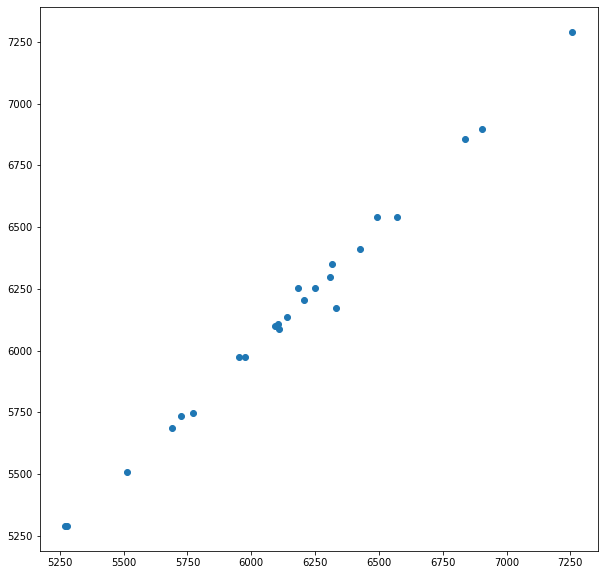

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred, y)
plt.show()

In [30]:
from sklearn.metrics import r2_score

r2_score(y_pred, y)

0.9926585651936929

Очень хорошо линеаризуемая по очкам функция. Скорее даже странно, что у нас не чётко линейная зависимость, видимо, за какой-то вид спорта очки начисляются не коэффициентом, а по квантилям или как-то так.for col, coef in zip(X.columns, pca.components_[0]):
    print('%s: %f' % (col, coef))

In [17]:
for col, coef in zip(X.columns, model.coef_):
    print('%s: %f' % (col, coef))

hurdles: -86.759854
highjump: 1187.875083
shot: 86.703371
run200m: -82.561405
longjump: 331.924516
javelin: 20.771852
run800m: -14.772705


Безумно странные коэффициенты, конечно. Ещё забавно то, что PCA и LinReg имеют разные знаки коэффициента при **javelin** и **run800m**.